In [10]:
# Read the numpy file

import numpy as np
import sys

data = np.load("./gait_features_combined.npy", allow_pickle=True)
print("Data shape:", data.shape)
print("First element type:", type(data.item()))
print("Data type:", data.dtype)

# Since data is a 0-d array containing a dict, let's extract the dict for easier access
gait_dict = data.item()
print("Keys in gait_dict:", gait_dict.keys())

# Print the first 5 elements of each key in the dictionary
for key in gait_dict:
    print(f"Key: {key}")
    if isinstance(gait_dict[key], list):
        print("First 5 elements:", gait_dict[key][:5])
    elif isinstance(gait_dict[key], np.ndarray):
        print("Shape:", gait_dict[key].shape)
        print("First 5 elements:", gait_dict[key][:5])
    else:
        print("Type:", type(gait_dict[key]))
        print("Value:", gait_dict[key])
    print()

Data shape: ()
First element type: <class 'dict'>
Data type: object
Keys in gait_dict: dict_keys([1, 3, 2])
Key: 1
Type: <class 'dict'>
Value: {'keypoints': [[32.29734, 24.692776, 34.16776, 22.053362, 29.39812, 22.502863, 0, 0, 24.215881, 23.593407, 43.239822, 35.66123, 16.34117, 37.160736, 52.516483, 53.495365, 6.751053, 55.129486, 30.46781, 60.976055, 11.691927, 52.119297, 34.618217, 79.72873, 18.95151, 79.78896, 30.329159, 114.35654, 22.074368, 113.18617, 27.82305, 146.39485, 25.579193, 144.61511], [29.454329, 25.066038, 32.209606, 22.512535, 26.882025, 22.755743, 36.82656, 22.482365, 0, 0, 44.37556, 34.75703, 19.372965, 36.841595, 56.13445, 53.541924, 7.9393506, 56.32479, 40.31401, 57.34638, 12.831858, 44.29122, 36.87459, 79.47186, 22.898388, 79.76042, 31.923424, 117.4588, 26.208115, 117.438, 28.025723, 150.48193, 27.268324, 150.95679], [30.672762, 24.906069, 33.048813, 22.315746, 27.960352, 22.647366, 34.844513, 22.574154, 31.58325, 23.317123, 40.993877, 34.948, 27.163334, 36.0316

In [52]:
# Read the numpy file

import numpy as np
import sys

data = np.load("./gait_features_flat_merged.npy", allow_pickle=True)
print("Data shape:", data.shape)
print("Data type:", data.dtype)
print("First element type:", type(data[0]))
print("First element:", data[2])

unique_ids = np.unique(data[:, 0])
print("Unique IDs:", unique_ids)
print("Number of unique IDs:", len(unique_ids))

Data shape: (489, 86)
Data type: float32
First element type: <class 'numpy.ndarray'>
First element: [ 1.00000000e+00  2.02000000e+02  9.68746109e+01  7.90570984e+01
  1.05259758e+02  6.91846924e+01  8.76104126e+01  6.97866058e+01
  1.18316872e+02  6.87363968e+01  7.47223129e+01  6.94229355e+01
  1.39504623e+02  1.22823151e+02  5.11035690e+01  1.12832428e+02
  1.50645630e+02  1.91353241e+02  1.81190968e+01  1.57932373e+02
  1.50298645e+02  2.62825897e+02  5.12060890e+01  1.96968536e+02
  1.15826294e+02  2.51447342e+02  6.09634666e+01  2.49812042e+02
  1.01071259e+02  3.40553528e+02  5.95815201e+01  3.47919434e+02
  8.24503479e+01  4.06815887e+02  5.97545891e+01  4.32970367e+02
  2.55278826e+00  3.21998835e-01  2.29995384e+01  4.67419853e+01
 -1.98351634e+00  6.28659546e-01  2.50000000e-01  6.80597544e+00
  4.59105682e+00  4.03253853e-01  1.16265523e+00  9.89234209e-01
  1.42461197e+02  6.68045139e+00  2.13250866e+01  1.21212125e-01
  1.66874741e+02  1.68392982e+01  4.80575323e+00  1.736

In [31]:
# there are total 86 columns
# 0 : TrackID
# 1 : FrameID
# 2 - 35 : 34 skeleton points
# 36 - 85 : 51 features

# Train LSTM model using the Trackid as label and frameid as time step and rest of the columns as features
# 1. Load the data
import numpy as np
data = np.load("./gait_features_flat.npy", allow_pickle=True)
print("Data shape:", data.shape)
print("Data type:", data.dtype)

# 2. Preprocess the data
def preprocess_data(data):
    # Extract the features and labels
    X = data[:, 2:]  # Features (all columns except TrackID and FrameID)
    y = data[:, 0]   # Labels (TrackID)

    # Normalize the features
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    return X, y
X, y = preprocess_data(data)
print("X shape:", X.shape)
print("y shape:", y.shape)

# 3. Reshape the data for LSTM
def reshape_data(X, y, time_steps=10):
    # Reshape the data to be 3D [samples, time steps, features]
    num_samples = X.shape[0] // time_steps
    X_reshaped = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y_reshaped = y[:num_samples * time_steps].reshape((num_samples, time_steps))

    return X_reshaped, y_reshaped
X_reshaped, y_reshaped = reshape_data(X, y)
print("X_reshaped shape:", X_reshaped.shape)
print("y_reshaped shape:", y_reshaped.shape)

# 4. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data shape: (286, 86)
Data type: float32
X shape: (286, 84)
y shape: (286,)
X_reshaped shape: (28, 10, 84)
y_reshaped shape: (28, 10)
X_train shape: (22, 10, 84)
X_test shape: (6, 10, 84)
y_train shape: (22, 10)
y_test shape: (6, 10)


In [43]:
# 1. Load the data
import numpy as np
data = np.load("./gait_features_flat.npy", allow_pickle=True)
print("Data shape:", data.shape)
print("Data type:", data.dtype)

# 2. Preprocess the data
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    X = data[:, 2:]  # Features
    y = data[:, 0]   # TrackID labels
    
    # Normalize features
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Encode TrackIDs to 0-based integers
    le = LabelEncoder()
    y = le.fit_transform(y)  # Transforms TrackIDs to 0, 1, 2, ..., n-1
    
    return X, y, le  # Return the encoder to track all classes

X, y, le = preprocess_data(data)  # Get the encoder
print("X shape:", X.shape)
print("y shape:", y.shape)

# 3. Reshape the data for LSTM
def reshape_data(X, y, time_steps=10):
    num_samples = X.shape[0] // time_steps
    X_reshaped = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y_reshaped = y[:num_samples * time_steps].reshape((num_samples, time_steps))
    
    # Use the first TrackID of each sequence (all frames belong to the same TrackID)
    y_reshaped = y_reshaped[:, 0]  # Shape: (num_samples,)
    
    return X_reshaped, y_reshaped

X_reshaped, y_reshaped = reshape_data(X, y)
print("X_reshaped shape:", X_reshaped.shape)
print("y_reshaped shape:", y_reshaped.shape)

# 4. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Build the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer matches total classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Use the encoder to get the total number of classes (including all TrackIDs)
num_classes = len(le.classes_)  # Critical fix: Use encoder's classes, not reshaped data
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape, num_classes)
print(model.summary())

# Train the model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

AssertionError: NaNs in features

In [44]:
# 1. Load and preprocess data
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = np.load("./gait_features_flat.npy", allow_pickle=True)

def preprocess_data(data):
    X = data[:, 2:]
    y = data[:, 0]
    
    # Add epsilon to prevent division by zero
    epsilon = 1e-8
    X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon)
    
    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le

X, y, le = preprocess_data(data)

# 2. Verify no NaNs/Infs
assert not np.isnan(X).any(), "NaNs in features"
assert not np.isinf(X).any(), "Infs in features"
assert not np.isnan(y).any(), "NaNs in labels"

# 3. Reshape data (same as before)
def reshape_data(X, y, time_steps=10):
    num_samples = X.shape[0] // time_steps
    X_reshaped = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y_reshaped = y[:num_samples * time_steps].reshape((num_samples, time_steps))
    return X_reshaped, y_reshaped[:, 0]  # Use first label of sequence

X_reshaped, y_reshaped = reshape_data(X, y)

# 4. Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# 5. Build model with gradient clipping and lower learning rate
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(LSTM(32, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Adam with lower learning rate + gradient clipping
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model((X_train.shape[1], X_train.shape[2]), len(le.classes_))

# 6. Train
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

AssertionError: NaNs in features

In [46]:
# 1. Load and preprocess data with NaN handling
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = np.load("./gait_features_flat.npy", allow_pickle=True)

def preprocess_data(data):
    X = data[:, 2:].astype(np.float32)
    y = data[:, 0]

    # Replace NaNs with column means
    col_means = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_means, inds[1])

    # Normalize features
    epsilon = 1e-8
    X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon)

    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le


X, y, le = preprocess_data(data)

# 2. Verify no NaNs/Infs after preprocessing
assert not np.isnan(X).any(), "NaNs in features (post-preprocessing)"
assert not np.isinf(X).any(), "Infs in features (post-preprocessing)"
assert not np.isnan(y).any(), "NaNs in labels"

# ... [Rest of the code remains unchanged from previous steps] ...

In [47]:

# 3. Reshape data (same as before)
def reshape_data(X, y, time_steps=10):
    num_samples = X.shape[0] // time_steps
    X_reshaped = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y_reshaped = y[:num_samples * time_steps].reshape((num_samples, time_steps))
    return X_reshaped, y_reshaped[:, 0]  # Use first label of sequence

X_reshaped, y_reshaped = reshape_data(X, y)

# 4. Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# 5. Build model with gradient clipping and lower learning rate
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(LSTM(32, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Adam with lower learning rate + gradient clipping
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model((X_train.shape[1], X_train.shape[2]), len(le.classes_))

# 6. Train
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/100


/Users/prachit/miniconda3/envs/pose/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.0000e+00 - loss: 1.7480 - val_accuracy: 0.0000e+00 - val_loss: 1.6559
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0600 - loss: 1.6434 - val_accuracy: 0.0000e+00 - val_loss: 1.6284
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0600 - loss: 1.5578 - val_accuracy: 0.0000e+00 - val_loss: 1.6024
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1801 - loss: 1.5602 - val_accuracy: 0.0000e+00 - val_loss: 1.5755
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3002 - loss: 1.5445 - val_accuracy: 0.0000e+00 - val_loss: 1.5492
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3395 - loss: 1.5546 - val_accuracy: 0.2000 - val_loss: 1.5242
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1593 - loss: 1.5704 - val_accuracy: 0.4000 - val_loss: 1.5002
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3603 - loss: 1.4453 - val_accuracy: 0.600

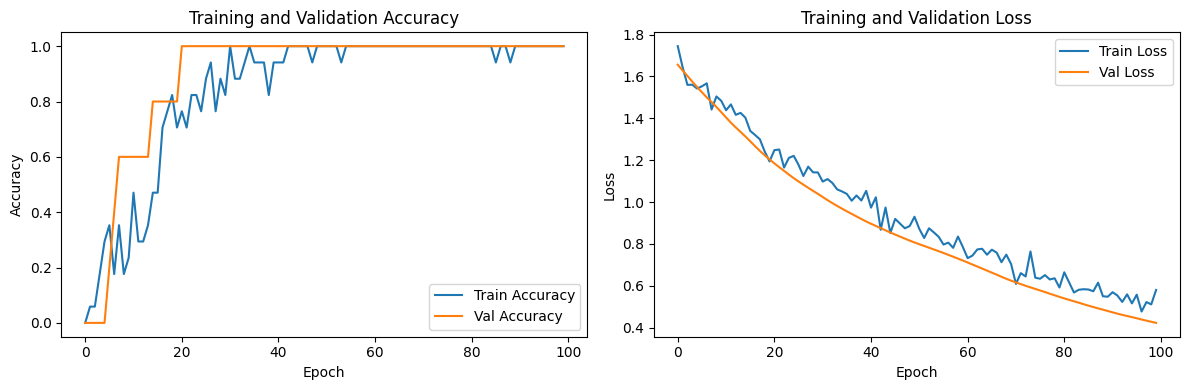

In [48]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (5).

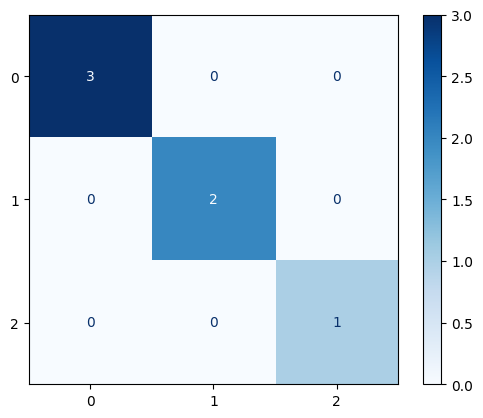

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


Epoch 1/100


/Users/prachit/miniconda3/envs/pose/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.1542 - loss: 1.8243 - val_accuracy: 0.1250 - val_loss: 1.7608
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1972 - loss: 1.7257 - val_accuracy: 0.1250 - val_loss: 1.7367
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2194 - loss: 1.6873 - val_accuracy: 0.1250 - val_loss: 1.7125
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2194 - loss: 1.7011 - val_accuracy: 0.1250 - val_loss: 1.6886
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2625 - loss: 1.6309 - val_accuracy: 0.2500 - val_loss: 1.6646
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2847 - loss: 1.6824 - val_accuracy: 0.2500 - val_loss: 1.6405
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3694 - loss: 1.6442 - val_accuracy: 0.2500 - val_loss: 1.6170
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3903 - loss: 1.5757 - val_accuracy: 0.3750 - val_loss: 1.5939
Epo

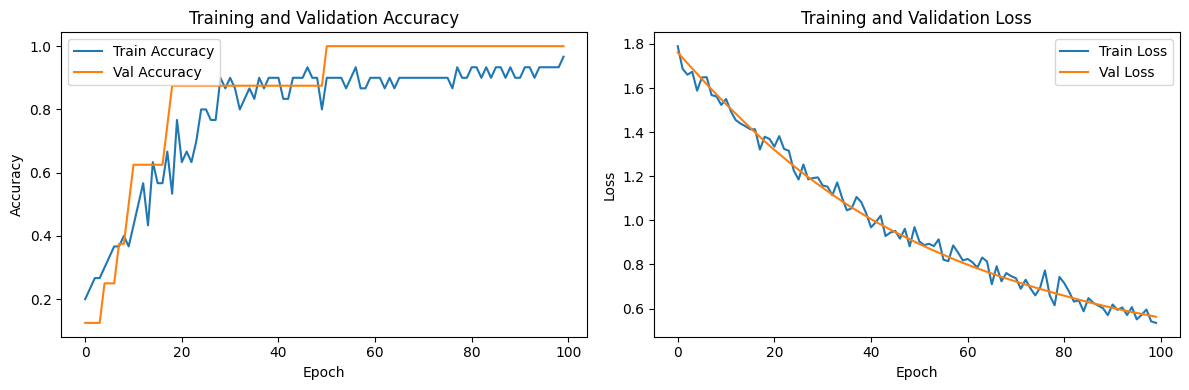

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

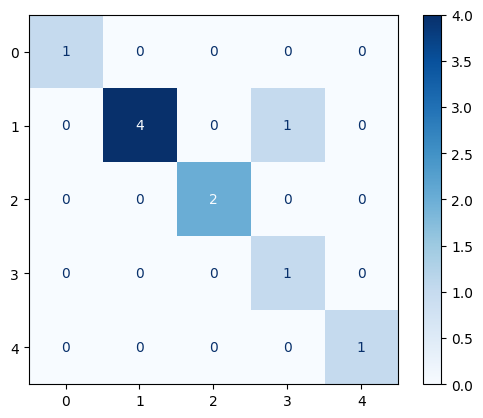

In [53]:
# 1. Load and preprocess data with NaN handling
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load data
data = np.load("./gait_features_flat_merged.npy", allow_pickle=True)

def preprocess_data(data):
    X = data[:, 2:].astype(np.float32)
    y = data[:, 0]

    # Replace NaNs with column means
    col_means = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_means, inds[1])

    # Normalize features
    epsilon = 1e-8
    X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon)

    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le

X, y, le = preprocess_data(data)

# 2. Verify no NaNs/Infs after preprocessing
assert not np.isnan(X).any(), "NaNs in features (post-preprocessing)"
assert not np.isinf(X).any(), "Infs in features (post-preprocessing)"
assert not np.isnan(y).any(), "NaNs in labels"

# 3. Reshape data
def reshape_data(X, y, time_steps=10):
    num_samples = X.shape[0] // time_steps
    X_reshaped = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y_reshaped = y[:num_samples * time_steps].reshape((num_samples, time_steps))
    return X_reshaped, y_reshaped[:, 0]  # Use first label of sequence

X_reshaped, y_reshaped = reshape_data(X, y)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# 5. Build model with gradient clipping and lower learning rate
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(LSTM(32, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Adam with lower learning rate + gradient clipping
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_model((X_train.shape[1], X_train.shape[2]), len(le.classes_))

# 6. Train
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 8. Plot training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Confusion Matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


Epoch  1: Train Acc = 0.286, Val Acc = 0.111
Epoch  2: Train Acc = 0.286, Val Acc = 0.111
Epoch  3: Train Acc = 0.250, Val Acc = 0.111
Epoch  4: Train Acc = 0.250, Val Acc = 0.111
Epoch  5: Train Acc = 0.286, Val Acc = 0.111
Epoch  6: Train Acc = 0.286, Val Acc = 0.222
Epoch  7: Train Acc = 0.286, Val Acc = 0.222
Epoch  8: Train Acc = 0.357, Val Acc = 0.222
Epoch  9: Train Acc = 0.393, Val Acc = 0.222
Epoch 10: Train Acc = 0.357, Val Acc = 0.222
Epoch 11: Train Acc = 0.357, Val Acc = 0.222
Epoch 12: Train Acc = 0.357, Val Acc = 0.222
Epoch 13: Train Acc = 0.393, Val Acc = 0.222
Epoch 14: Train Acc = 0.429, Val Acc = 0.222
Epoch 15: Train Acc = 0.429, Val Acc = 0.222
Epoch 16: Train Acc = 0.357, Val Acc = 0.222
Epoch 17: Train Acc = 0.464, Val Acc = 0.222
Epoch 18: Train Acc = 0.500, Val Acc = 0.222
Epoch 19: Train Acc = 0.571, Val Acc = 0.222
Epoch 20: Train Acc = 0.536, Val Acc = 0.222
Epoch 21: Train Acc = 0.500, Val Acc = 0.222
Epoch 22: Train Acc = 0.571, Val Acc = 0.222
Epoch 23: 

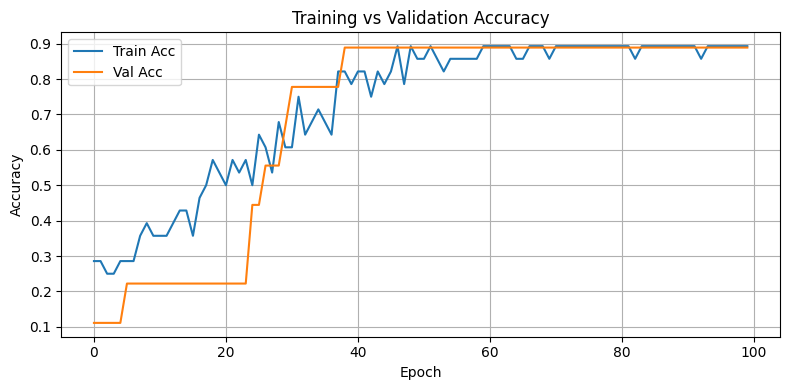

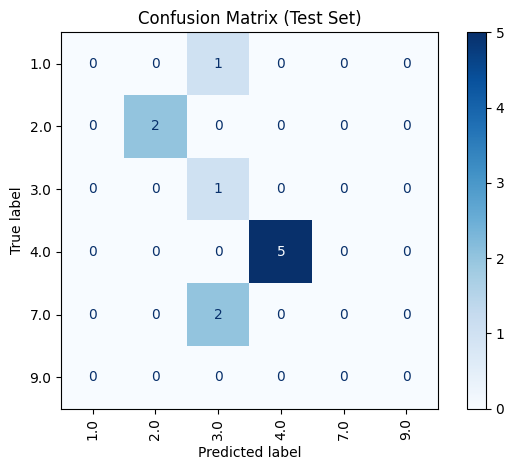

In [6]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load and preprocess
data = np.load("gait_features_flat_merged.npy", allow_pickle=True)

def preprocess(data):
    X = data[:, 2:].astype(np.float32)
    y = data[:, 0]
    
    col_means = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_means, inds[1])
    
    epsilon = 1e-8
    X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon)
    
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le

X, y, le = preprocess(data)

# 2. Reshape for LSTM
def reshape(X, y, time_steps=10):
    num_samples = X.shape[0] // time_steps
    X = X[:num_samples * time_steps].reshape((num_samples, time_steps, -1))
    y = y[:num_samples * time_steps].reshape((num_samples, time_steps))
    return X, y[:, 0]

X_seq, y_seq = reshape(X, y)

# 3. Convert to Torch tensors
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

# 4. Dataset split: 60/20/20 (train/val/test)
dataset = TensorDataset(X_tensor, y_tensor)
total = len(dataset)
train_size = int(0.6 * total)
val_size = int(0.2 * total)
test_size = total - train_size - val_size

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16)
test_loader = DataLoader(test_set, batch_size=16)

# 5. Define Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.lstm1 = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim//2, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim//2, num_classes)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        out, _ = self.lstm2(out)
        out = self.dropout2(out)
        out = out[:, -1, :]
        return self.fc(out)

# Initialize model
input_dim = X_tensor.shape[2]
hidden_dim = 64
num_classes = len(le.classes_)
model = LSTMClassifier(input_dim, hidden_dim, num_classes)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 6. Train
best_val_loss = float('inf')
patience, patience_counter = 10, 0
train_accs, val_accs = [], []

for epoch in range(100):
    model.train()
    total, correct, train_loss = 0, 0, 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        torch.nn.utils.clip_grad_value_(model.parameters(), 1.0)
        optimizer.step()
        
        train_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)

    train_acc = correct / total
    train_accs.append(train_acc)

    # Validation
    model.eval()
    with torch.no_grad():
        val_total, val_correct, val_loss = 0, 0, 0
        for xb, yb in val_loader:
            out = model(xb)
            val_loss += criterion(out, yb).item()
            pred = out.argmax(dim=1)
            val_correct += (pred == yb).sum().item()
            val_total += yb.size(0)
        val_acc = val_correct / val_total
        val_accs.append(val_acc)

    print(f"Epoch {epoch+1:2d}: Train Acc = {train_acc:.3f}, Val Acc = {val_acc:.3f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pt"))

# 7. Test Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        preds = out.argmax(dim=1)
        all_preds.extend(preds.numpy())
        all_labels.extend(yb.numpy())

test_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"\n✅ Final Test Accuracy: {test_accuracy:.2f}")

# 8. Plot Accuracy Curves
plt.figure(figsize=(8, 4))
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds, labels=range(len(le.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()
